# =====================================
#  7A - L1 Introduction to tracking
# =====================================

## Examples of tracking



<br />
<figure>
  <img src="imgs/L71.gif" width=300/>
  <img src="imgs/L72.gif" width=300/>
  <center><figcaption>Fig.1(a) Old example</figcaption></center>
</figure>

------------------


<br />
<figure>
  <img src="imgs/L73.gif" width=300/>
  <img src="imgs/L74.gif" width=300/>
  <center><figcaption>Fig.1(b) Newer examples</figcaption></center>
</figure>

## Tracking Challenge

1. Many places it's hard to compute opticl flow.
2. There can be large displacements since could be moving rapidly
    probably need to take dynamics into account
3. Errors would compound - or drift
4. Occlusions, disocclusions 
    


## Shi-Tomasi feature tracker

"Only compute motion where you should?

Find good features using eigenvalues of second-moment matrix - you've seen the now twice!

- Key idea: "good" features to track are the ones that can be tracked reliably


1. From frame to frame, track with Lcas-Kanade and a pute translation model
    - More robust for small displacements, can be estimated from smaller neighborhoods
    
2. Check consistency of tracks by affine registration to the first (or earlier) observed instance of the feature
    - Affine model is more accurate for larger displacements
    - Comparing to the first or early frame helps to minimize drift
    
  <br />
<figure>
  <img src="imgs/L75.png" width=300/>
  <center><figcaption>Fig.2 J.Shi and C.Tomasi. *Good Features to Track* CVPR 1994</figcaption></center>
</figure>  

## Tracking with Dynamics

Key idea: Given a model of expected motion, predict where objects will occur in the next frame, even before seeing the image
 - Restrict search for object
 - Improved estimates since measurement noise is reduced by trajectory smoothness
 

## Detection vs Tracking

The idea of using prediction is the difference between tracking and just detecting


**Detection**: We *detect* the object *independently* in each frame

  <br />
<figure>
<img src="imgs/L76.png" width=500/>
<center><figcaption>Fig.3(a): detection</figcaption></center>
</figure> 

**Tracking**: We *predict* the new location of the object in the next frame using *estimated dynamics*. Then we *update* based upon measurements

   <br />
<figure>
<img src="imgs/L77.png" width=500/>
<center><figcaption>Fig.3(b): tracking</figcaption></center>
</figure> 

## Tracking with dynamics 

Key idea: Given a model of expected motion, predict where objects will occur in the next frame, even before seeing the image

**Goals**:

- Do less work looking fro the object, restrict the search.
- Get improved estimates since measurement noise is tempered by smoothness, dynamics priors

**Assumption** continuous (modeled) motion patterns:
- Objects do not disappear and reappear in different places in the scene  
- Camera is not moving instantaniously to new viewpoint
- Gradual change in pose between camera and scene
    


# =====================================
#  7B - L1 Tracking as Inference
# =====================================

### Tracking as inference

Hidden state(**X**): True parameters we care about

Measurement(**Y**): Noise observation of underlying state

At each time step *t*, state changes (from $X_{t-1}$ to $X_t$), and we get a new observation $Y_t$

Our goal: Recover (estimate) most likely (density or distribution) state $X_t$ given 
- All observations seen sor far
- Knwoledge about dynamics of state transitions


### Quiz


   <br />
<figure>
<img src="imgs/L78.png" width=500/>
<center><figcaption>Fig.4</figcaption></center>
</figure> 

## Tracking as Inference


<br />
<figure>
<img src="imgs/L79.png" width=500/>
<center><figcaption>Fig.5</figcaption></center>
</figure> 

In [32]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output, Image as NoteImage, display
import PIL
from io import BytesIO
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [30]:
def red(im):
    return im[:,:,0]
def green(im):
    return im[:,:,1]
def blue(im):
    return im[:,:,2]
def gray(im):
    return cv.cvtColor(im, cv.COLOR_BGR2GRAY)

In [35]:
%matplotlib inline
def imshow(im,fmt='jpeg'):
    #a = np.uint8(np.clip(im, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(im).save(f, fmt)
    display(NoteImage(data=f.getvalue()))
def imsave(im,filename,fmt='jpeg'):
    #a = np.uint8(np.clip(im, 0, 255))
    PIL.Image.fromarray(im).save(filename, fmt)
def imread(filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

(0, 30)

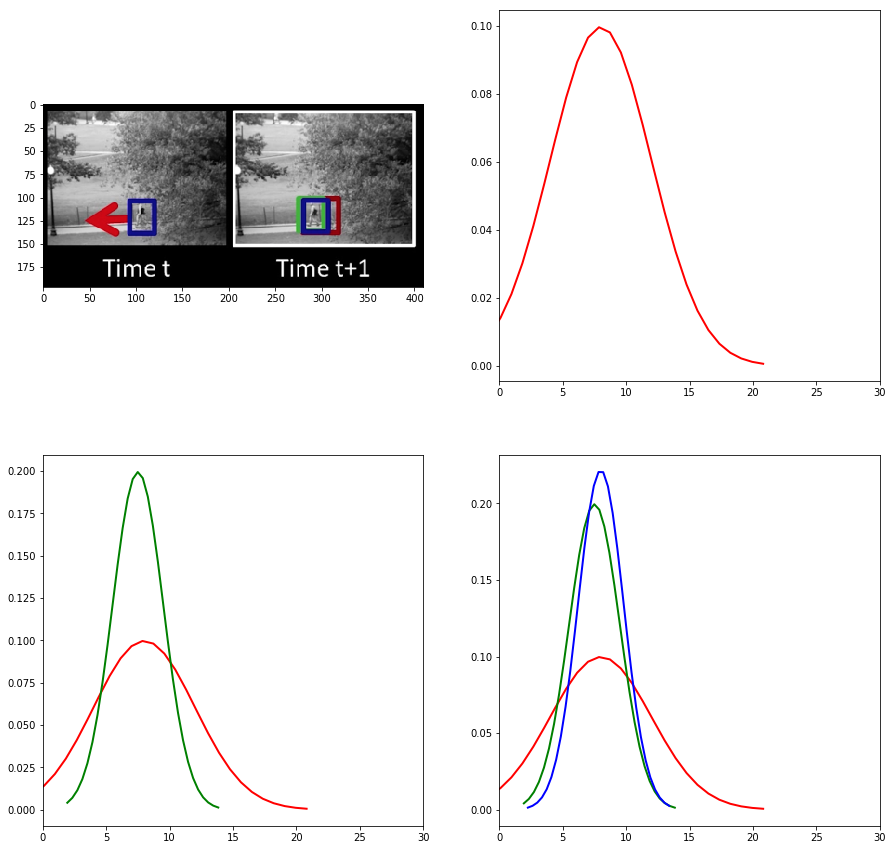

In [43]:

fig , ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches((15,15))

img = imread("imgs/L710.png")

ax[0,0].imshow(img)


mu,sigma = 8,4
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = ax[0,1].hist(s, 30, density=True)
ax[0,1].clear()
ax[0,1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
ax[0,1].set_xlim((0,30))

mu2,sigma2 = 7.5,2
s2 = np.random.normal(mu2, sigma2, 1000)
count2, bins2, ignored2 = ax[1,0].hist(s2, 30, density=True)
ax[1,0].clear()
ax[1,0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
ax[1,0].plot(bins2, 1/(sigma2 * np.sqrt(2 * np.pi)) *
                np.exp( - (bins2 - mu2)**2 / (2 * sigma2**2) ),
          linewidth=2, color='g')
ax[1,0].set_xlim((0,30))



mu3,sigma3 = 8,1.8
s3 = np.random.normal(mu3, sigma3, 1000)
count3, bins3, ignored3 = ax[1,1].hist(s3, 30, density=True)
ax[1,1].clear()

ax[1,1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
ax[1,1].plot(bins2, 1/(sigma2 * np.sqrt(2 * np.pi)) *
                np.exp( - (bins2 - mu2)**2 / (2 * sigma2**2) ),
          linewidth=2, color='g')
ax[1,1].plot(bins3, 1/(sigma3 * np.sqrt(2 * np.pi)) *
                np.exp( - (bins3 - mu3)**2 / (2 * sigma3**2) ),
          linewidth=2, color='b')
ax[1,1].set_xlim((0,30))

## Steps of tracking

**Prediction:** What is the next state of the object given past measurements?

$$\color{blue}{P(X_t|Y_0 = y_0,...,Y_{t-1} = y_{t-1})}$$

**Correction:** Compute an updated estimate of the state from prediction and measutrements

$$\color{blue}{P(X_t|Y_0 = y_0,...,Y_{t-1}, Y_t = y_t )}$$

*Tracking: The process of propagating the* ***Posterior*** *distribution of state given measurements across time*

### Quiz

<br />
<figure>
<img src="imgs/L711.png" width=500/>
<center><figcaption>Fig.6</figcaption></center>
</figure> 

## Simplifying Assumptions


1. Only the immediate past matters

$$\color{blue}{P(X_t|X_0,...,X_{t-1}) = P(X_t|X_{t-1})}$$

$\color{blue}{P(X_t|X_{t-1})}$:<font color='red'> dynamics model</font>


2. Measurements depend only on the current state

$$\color{blue}{P(Y_t|X_0,Y_0,...,X_{t-1},Y_{t-1},X_t) = P(Y_t|X_t)}$$

$\color{blue}{P(Y_t|X_t)}$:<font color='red'> observation model</font>

<br />
<figure>
<img src="imgs/L712.png" width=500/>
<center><figcaption>Fig.7</figcaption></center>
</figure> 

## Tracking as Induction

Base case:

- Assume we have sime intial prior that predicts state in the absence of any evidence: **$P(X_0)$**
- At the first frame, *correct* this, given value of **$Y_0 = y_0$**

- Given corrected estimate for frame **$t$**:
    - Predict for frame **$t+1$**
    - Correct for frame **$t+1$**

## Prediction

Given: $\color{blue}{P(X_{t-1}|y_0,...,y_{t-1})}$<br/>
Guess: $\color{blue}{P(X_{t}|y_0,...,y_{t-1})}$<br/>

$$\color{blue}{\int P(X_t,X_{t-1}|y_0,...,y_{t-1})dX_{t-1}}$$
<center><font color="green">Law of total probability - Marginalization</font></center>

$$\color{blue}{\int P(X_t,X_{t-1}|y_0,...,y_{t-1}) P(X_{t-1}|y_0,...,y_{t-1})dX_{t-1}}$$

<center><font color="green">Conditioning on $X_{t-1}$ [ recall $P(A,B) = p(A|B)P(B)$]</font></center>

$$\color{blue}{\int P(X_t,X_{t-1})P(X_{t-1}|y_0,...,y_{t-1})dX_{t-1}}$$

<center><font color="green">Independence assumption</font></center>



## Correction

Given predicted value <font color="blue">**$P(X_t|y_0,...,y_{t-1})$**</font> and <font color="blue">**$y_t$**</font> compute <font color="blue">**$P(X_t|y_0,...,y_t)$**</font>

$$\color{blue}{= \frac{P(y_t|X_t,y_0,...,y_{t-1})P(X_t|y_0,...,y_{t-1})}{P(y_t|y_0,...,y_{t-1})}}$$

<br/>
<center><font color="green">Bayes rule: $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$</font></center>

$$\color{blue}{= \frac{P(y_t|X_t)P(X_t|y_0,...,y_{t-1})}{P(y_t|y_0,...,y_{t-1})}}$$
<br/>
<center><font color="green">Independence assumption (observation $y_t$ depends only on state $X_t$)</font></center>

$$\color{blue}{P(X_t| y_0,...,y_{t-1},y_t)= \frac{P(y_t|X_t)P(X_t|y_0,...,y_{t-1})}{\int P(y_t|X_t)P(X_t|y_0,...,y_{t-1})dX_t}}$$
<br/>
<center><font color="green">Conditioning on $X_t$</font></center>

# =====================================
#  7B- L2 The Kalman Filter
# =====================================

## Linear  Models

### Linear Dynamics Model

Dynamics model: State undergoes linear transformation plus Gaussian noise

$$\color{blue}{X_t\sim N\left (D_tx_{t-1},\sum_{d_t}\right )}$$

### Linear Measurement Model

Observation model: Measurement is linearly transformed state plus Gaussian noise

$$\color{blue}{y_t\sim N\left (M_tx_{t},\sum_{m_t}\right )}$$



## Constant Velocity 1D Example

### Example: Constant velocity (1D)

State vector is position and velocity

$$\color{blue}{x_t = \begin{bmatrix}p_t\\v_t\end{bmatrix}}$$

$$\color{blue}{p_t = p_{t-1} + (\Delta t)v_{t-1} + \epsilon}$$

$$\color{blue}{v_t = v_{t-1} + \xi}$$

$$\color{blue}{x = D_tx_{t-1} + noise = \begin{bmatrix}1&\Delta t\\0&1\end{bmatrix}\begin{bmatrix}p_{t-1}\\v_{t-1}\end{bmatrix} + noise }$$

Measurement is position only

$$\color{blue}{y_t = Mx_t + noise = \begin{bmatrix}1&0\end{bmatrix}\begin{bmatrix}p_t\\v_t\end{bmatrix} + noise}$$

## Constant Acceleration 1D Example

### Example: Constant acceleration (1D)

State vector is position, velocity & acceleration

$$x\color{blue}{_t = \begin{bmatrix}p_t\\v_t\\a_t\end{bmatrix} }$$

$$\color{blue}{p_t = p_{t-1} + (\Delta t)v_{t-1} + \epsilon}$$

$$\color{blue}{v_t = v_{t-1} + (\Delta t)a_{t-1} +\xi}$$

$$\color{blue}{a_t = a_{t-1} + \zeta}$$

$$\color{blue}{x = D_tx_{t-1} + noise = \begin{bmatrix}1&\Delta t & 0\\0&1 &\Delta t\\0&0&1\end{bmatrix}\begin{bmatrix}p_{t-1}\\v_{t-1}\\a_{t-1}\end{bmatrix} + noise }$$


Measurement is position only

$$\color{blue}{y_t = Mx_t + noise = \begin{bmatrix}1&0&0\end{bmatrix}\begin{bmatrix}p_t\\v_t\\a_t\end{bmatrix} + noise}$$

## The Kalman Filter

<br />
<figure>
<img src="imgs/L713.png" width=500/>
<center><figcaption>Fig.8</figcaption></center>
</figure> 

## The Kalman Filter 1D State

<font color="blue">$P(X_t|y_0,...,y_{t-1})$</font><br/>
Mean and std. dev. of predicted state: <font color="blue">$\mu_t^-,
\sigma_t^-$</font><br/>
<br />
<div style="text-align: left">
<img style="text-align: left" src="imgs/L714.png" width=120 />
</div>
<br/>
<font color="blue">$P(X_t|y_0,...,y_{t})$</font><br/>
Mean and std. dev. of predicted state: <font color="blue">$\mu_t^+,
\sigma_t^+$</font><br/>

## 1D Kalman Filter Prediction

Linear dynamics model defines predicted state evolution, with noise

$$\color{blue}{X_t\sim N\left (dx_{t-1},\sigma^2_d\right )}$$

Want to estimate distribution for next predicted state

$$\color{blue}{P(X_t|y_0,...,y_{t-1}) = \int P(X_t|X_{t-1})P(X_{t-1}|y_0,...,y_{t-1})dX_{t-1}}$$

The distribution for next predicted state is also Gaussian

$$\color{blue}{P(X_t|y_0,...,y_{t-1}) = N\left (\mu^-_t,(\sigma_t^-)^2\right )}$$

Update the mean:

$$\color{blue}{\mu^-_t = d\mu^+_{t-1}}$$

Update the variance:

$$\color{blue}{(\sigma^-_t)^2 = \sigma_d^2+(d\sigma^+_{t-1})^2 }$$

## 1D Kaman Filter Correction

Mapping of state to measurements:

$$\color{blue}{Y_t\sim N\left (mx_t,\sigma^2_m\right )}$$

Predicted state: 

$$\color{blue}{P(X_t|y_0,...,y_{t-1}) = N\left (\mu^-_t,(\sigma_t^-)^2\right )}$$

Want to estimate corrected distribution

$$\color{blue}{P(X_t| y_0,...,y_{t-1},y_t)= \frac{P(y_t|X_t)P(X_t|y_0,...,y_{t-1})}{\int P(y_t|X_t)P(X_t|y_0,...,y_{t-1})dX_t}}$$

**Kalman**: With linear, Gaussian dynamics and measutrements, the corrected distribution to be:

$$\color{blue}{O(X_t|y_0,...,y_t) \equiv N\left (\mu^+_t,(\sigma_t^+)^2\right )}$$

Update the mean:

$$\color{blue}{\mu^+_t = \frac{\mu^-_t\sigma_m^2 + my_t(\sigma_t^-)^2}{\sigma_m^2 + m^2(\sigma_t^-)^2}}$$

Update the variance:

$$\color{blue}{(\sigma^+_t)^2 = \frac{\sigma_m^2(\sigma_t^-)^2}{\sigma_m^2 + m^2(\sigma_t^-)^2}}$$



## 1D Kalman Filter Intuition

From:

$$\color{blue}{\mu^+_t = \frac{\mu^-_t\sigma_m^2 + my_t(\sigma_t^-)^2}{\sigma_m^2 + m^2(\sigma_t^-)^2}}$$

Dividing throughout by <font color="blue">**$m^2$**</font>...


$$\color{blue}{\mu^+_t = \frac{\frac{\mu^-_t\sigma_m^2}{m^2} + \frac{y_t}{m}(\sigma_t^-)^2}{\frac{\sigma_m^2}{m^2} + (\sigma_t^-)^2}}$$

What is this?

$\color{blue}{\frac{y_t}{m}}$ is the measurement guess of $\color{blue}{x}$<br/>

$\color{blue}{\frac{\mu^-_t\sigma_m^2}{m^2}}$ is the prediction of $\color{blue}{x}$<br/>

$\color{blue}{\frac{\sigma_m^2}{m^2}}$ is the variance of$\color{blue}{x}$ computed from the measurement<br/>

$\color{blue}{(\sigma_t^-)^2}$ is the variance of prediction<br/>


- The weighted average of prediction and measurement based on variances!



## Prediction vs. Correction


What if there is no prediction uncertainty? ($\color{blue}{\sigma^-_t = 0}$)

$$\color{blue}{\mu^+_t = \mu^-_t}$$

$$\color{blue}{(\sigma^+_t)^2 = 0}$$

<center><font color="red">The measurement is ignored!</font></center>


What if there is no measurement uncertainty? ($\color{blue}{\sigma_m = 0}$)

$$\color{blue}{\mu^+_t = \frac{y_t}{m}}$$

$$\color{blue}{(\sigma^+_t)^2 = 0}$$

<center><font color="red">The prediction is ignored!</font></center>


## 1D Kalman Filter: Intuition

Also:

$$\color{blue}{\mu^+_t = \frac{\frac{\mu^-_t\sigma_m^2}{m^2} + \frac{y_t}{m}(\sigma_t^-)^2}{\frac{\sigma_m^2}{m^2} + (\sigma_t^-)^2}}$$


$$\color{blue}{\mu^+_t = \frac{a\mu^-_t + b\frac{y_t}{m}}{a+b} = \frac{(a+b)\mu^-_t + b(\frac{y_t}{m} - \mu^-_t)}{a+b}}$$


$$\color{blue}{\mu^+_t = \mu_t^- + \frac{b(\frac{y_t}{m}-\mu^-_t)}{a+b} = \mu^-_t + k(\frac{y_t}{m}-\mu^-_t)}$$

$\color{blue}{\mu^-_t}$ is the predicted<br/>

$\color{blue}{(\frac{y_t}{m}-\mu^-_t)}$ is the residual<br/>

$\color{blue}{k}$ is the Kalman Gain<br/>

### Recall: constant velocity model example


<br />
<figure>
<img src="imgs/L710.png" width=300/>
<center><figcaption>Fig.9(a)</figcaption></center>
</figure>

State is 2d: position + velocity

Measurement is 1d: position

<br />
<figure>
<img src="imgs/L715.png" width=300/>
<center><figcaption>Fig.9(b)</figcaption></center>
</figure>

<br />
<figure>
<img src="imgs/L716.png" width=500/>
<img src="imgs/L717.png" width=500/>
<center><figcaption>Fig.9(c)</figcaption></center>
</figure>


In [57]:
# from https://medium.com/@jaems33/understanding-kalman-filters-with-python-2310e87b8f48

import numpy as np
from numpy.linalg import inv

x_observations = np.array([4000, 4260, 4550, 4860, 5110])
v_observations = np.array([280, 282, 285, 286, 290])

z = np.c_[x_observations, v_observations]

# Initial Conditions
a = 2  # Acceleration
v = 280
t = 1  # Difference in time

# Process / Estimation Errors
error_est_x = 20
error_est_v = 5

# Observation Errors
error_obs_x = 25  # Uncertainty in the measurement
error_obs_v = 6

def prediction2d(x, v, t, a):

    A = np.array([[1, t],
                  [0, 1]])
    X = np.array([[x],
                  [v]])
    B = np.array([[0.5 * t ** 2],
                  [t]])
    ## Position = P_ + tv + 0.5at^2
    ## Velocity = V_ + at
    X_prime = A.dot(X) + B.dot(a)
    return X_prime


def covariance2d(sigma1, sigma2):
    cov1_2 = sigma1 * sigma2
    cov2_1 = sigma2 * sigma1
    cov_matrix = np.array([[sigma1 ** 2, cov1_2],
                           [cov2_1, sigma2 ** 2]])
    return np.diag(np.diag(cov_matrix))


# Initial Estimation Covariance Matrix
P = covariance2d(error_est_x, error_est_v)
A = np.array([[1, t],
              [0, 1]])

# Initial State Matrix
X = np.array([[z[0][0]],
              [v]])
n = len(z[0])

for data in z[1:]:
    X = prediction2d(X[0][0], X[1][0], t, a)
    # To simplify the problem, professor
    # set off-diagonal terms to 0.
    P = np.diag(np.diag(A.dot(P).dot(A.T)))

    # Calculating the Kalman Gain
    H = np.identity(n)
    R = covariance2d(error_obs_x, error_obs_v)
    S = H.dot(P).dot(H.T) + R
    K = P.dot(H).dot(inv(S))

    # Reshape the new data into the measurement space.
    Y = H.dot(data).reshape(n, -1)

    # Update the State Matrix
    # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
    X = X + K.dot(Y - H.dot(X))

    # Update Process Covariance Matrix
    P = (np.identity(len(K)) - K.dot(H)).dot(P)

print("Kalman Filter State Matrix:\n", X)

Kalman Filter State Matrix:
 [[5127.05898493]
 [ 288.55147059]]


## N-dimensional

In the two dimensional space:

**Predict**

$$\color{blue}{X_t^- = D_tx_{t-1}^+}$$

$$\color{blue}{\Sigma^-_t = D_t\Sigma^+_{t-1}D^T_t + \Sigma_{d_t}}$$

**Correct**

$$\color{blue}{K_t = \Sigma^-_tM^T_t\left (M_t\Sigma^-_tM^T_t+\Sigma_{m_t}\right )^{-1}}$$

$$\color{blue}{x^+_t= x^-_t + K_t(y_t - M_tx_t^-)}$$

$$\color{blue}{\Sigma^+_t = (I-K_tM_t)\Sigma^-_t}$$


The Kalman Gain Matrix <strong>$K_t$</strong> has less weight on residual as a priori estimate error covariance approaches zero. On the other hand, if my measurement coveriance approaches zero, more wheight on residual.

## Tracking with Kalman Filters

Tracking with KFs: Gaussians


<br />
<figure>
<img src="imgs/L718.png" width=500/>
<center><figcaption>Fig.10</figcaption></center>
</figure>

In [ ]:
# """
# Run the following code in the terminal so you can exit gracefully. 
# Source: https://stackoverflow.com/questions/42904509/opencv-kalman-filter-python
# """
# #!/usr/bin/env python
# """
#    Tracking of rotating point.
#    Rotation speed is constant.
#    Both state and measurements vectors are 1D (a point angle),
#    Measurement is the real point angle + gaussian noise.
#    The real and the estimated points are connected with yellow line segment,
#    the real and the measured points are connected with red line segment.
#    (if Kalman filter works correctly,
#     the yellow segment should be shorter than the red one).
#    Pressing any key (except ESC) will reset the tracking with a different speed.
#    Pressing ESC will stop the program.
# """
# # Python 2/3 compatibility
# import sys
# PY3 = sys.version_info[0] == 3

# if PY3:
#     long = int

# import cv2
# from math import cos, sin, sqrt
# import numpy as np

# if __name__ == "__main__":

#     img_height = 500
#     img_width = 500
#     kalman = cv2.KalmanFilter(2, 1, 0)

#     code = long(-1)

#     cv2.namedWindow("Kalman")

#     while True:
#         state = 0.1 * np.random.randn(2, 1)

#         kalman.transitionMatrix = np.array([[1., 1.], [0., 1.]])
#         kalman.measurementMatrix = 1. * np.ones((1, 2))
#         kalman.processNoiseCov = 1e-5 * np.eye(2)
#         kalman.measurementNoiseCov = 1e-1 * np.ones((1, 1))
#         kalman.errorCovPost = 1. * np.ones((2, 2))
#         kalman.statePost = 0.1 * np.random.randn(2, 1)

#         while True:
#             def calc_point(angle):
#                 return (np.around(img_width/2 + img_width/3*cos(angle), 0).astype(int),
#                         np.around(img_height/2 - img_width/3*sin(angle), 1).astype(int))

#             state_angle = state[0, 0]
#             state_pt = calc_point(state_angle)

#             prediction = kalman.predict()
#             predict_angle = prediction[0, 0]
#             predict_pt = calc_point(predict_angle)

#             measurement = kalman.measurementNoiseCov * np.random.randn(1, 1)

#             # generate measurement
#             measurement = np.dot(kalman.measurementMatrix, state) + measurement

#             measurement_angle = measurement[0, 0]
#             measurement_pt = calc_point(measurement_angle)

#             # plot points
#             def draw_cross(center, color, d):
#                 cv2.line(img,
#                          (center[0] - d, center[1] - d), (center[0] + d, center[1] + d),
#                          color, 1, cv2.LINE_AA, 0)
#                 cv2.line(img,
#                          (center[0] + d, center[1] - d), (center[0] - d, center[1] + d),
#                          color, 1, cv2.LINE_AA, 0)

#             img = np.zeros((img_height, img_width, 3), np.uint8)
#             draw_cross(np.int32(state_pt), (255, 255, 255), 3)
#             draw_cross(np.int32(measurement_pt), (0, 0, 255), 3)
#             draw_cross(np.int32(predict_pt), (0, 255, 0), 3)

#             cv2.line(img, state_pt, measurement_pt, (0, 0, 255), 3, cv2.LINE_AA, 0)
#             cv2.line(img, state_pt, predict_pt, (0, 255, 255), 3, cv2.LINE_AA, 0)

#             kalman.correct(measurement)

#             process_noise = sqrt(kalman.processNoiseCov[0,0]) * np.random.randn(2, 1)
#             state = np.dot(kalman.transitionMatrix, state) + process_noise

#             cv2.imshow("Kalman", img)

#             code = cv2.waitKey(100)
#             if code != -1:
#                 break

#         if code in [27, ord('q'), ord('Q')]:
#             break

#     cv2.destroyWindow("Kalman")

<br />
<figure>
<img src="imgs/L721.gif" width=200/>
<center><figcaption>Fig.11: Output of the previous code</figcaption></center>
</figure>

## A Fake Quiz

<br />
<figure>
<img src="imgs/L719.png" width=500/>
<img src="imgs/L720.png" width=500/>
<center><figcaption>Fig.12: Does this agree with your intuition?</figcaption></center>
</figure>

## Kalman Pros and Cons

- Pros
    - Simple updates, compact and efficient
- Cons
    - Unimodel distribution, only single hypothesis
    - Restricted class of motions defined by linear model
        - Extensions call "Extended Kalman Filtering"

<font color="red">So what might we do if not Gaussian? or even unimodel?</font>

# =====================================
#  7C - L1 Bayes Filters
# =====================================

### Recall: Tracking with dynamics

Key idea: Given a model of expected motion, predict where objects will occur in next frame, even before seeing the image

**Goals**:
- Do less work looking for the object, restrict the search
- Get improved estimates since measurement noise is tempered by smoothness, dynamics priors

### The Kalman filter

- A method for tracking *linear dynamical models* in *Gaussian noise* contexts (dynamics and measurements).

- Predicted/corrected *state densities* are *Gaussian*
    - You only need to maintain the mean and covariance
    - The calculations are easy (all the integrals can be done in closed form)
    

## Propagation of Gaussian Densities

<br />
<figure>
<img src="imgs/L713.png" width=500/>
<img src="imgs/L722.png" width=500/>
<center><figcaption>Fig.12</figcaption></center>
</figure> 

## Particle Filters Basic Idea

In particle filtering, the measurements are written as $z_t$ and not as $y_t$
- So we'll start seeing *$\color{blue}{z}$*'s

<br />
<figure>
<img src="imgs/L723.png" width=500/>
<center><figcaption>Fig.13</figcaption></center>
</figure> 

Density is represented by both **where** the particles are and their **weight**. 

$\color{blue}{p(x=x_0)}$ is now probability of drawing an x with value (really close to) $x_0$


Goal: <font color="blue">$p(x_t\in X_t) \approx p(x_t|z_{\{1...t\}})$</font> with equality when <font color="blue">$n \to \infty$</font>

## Perturbation

No notes, talk in the lecture

## Quiz

Which of the following we can model perturbation for?

<br />
<figure>
<img src="imgs/L724.png" width=500/>
<center><figcaption>Fig.14</figcaption></center>
</figure> 

## Bayes Filters Framework

Given
1. Prior probability of the system state **p(x)**
2. Action (dynamical system) model:

$$\color{blue}{p(x_t|u_{t-1}, x_{t-1})}$$

3. Sensor model (likelihood) $\color{blue}{p(z|x)}$
4. Stream of observations **$\color{blue}{z}$** and action data **$\color{blue}{u}$**

$$\color{blue}{ data_t = \{u_1,z_2,...,u_{t-1},z_t\}}$$

<font color="green"><strong>Wanted</strong></font>
- Estimate of the state $\color{blue}{X}$ at time $\color{blue}{t}$
- The posterior of the state is also called <font color="green"><strong>belief</strong></font>:

$$\color{blue}{Bel(x_t) = P(x_t| u_1,z_2,...,u_{t-1},z_t)}$$

## Quiz

How likely ?

<br />
<figure>
<img src="imgs/L725.png" width=500/>
<center><figcaption>Fig.15</figcaption></center>
</figure> 

## Graphical Model Representation

<br />
<figure>
<img src="imgs/L726.png" width=500/>
<center><figcaption>Fig.16</figcaption></center>
</figure> 

$$\color{blue}{p(z_t|x_{0:t}, z_{1:t-1}, u_{1:t}) = p(z_t|x_t)}$$
$$\color{blue}{p(x_t|x_{1:t-1},z_{1:t-1},u_{1:t}) = p(x_t|x_{t-1},u_t)}$$

## Bayes Rule Reminder

$$\color{blue}{p(x|z) = \frac{p(z|x)p(x)}{p(z)}}$$

$$\color{blue}{= \eta p(z|x)p(x)}$$

$$\color{blue}{\propto p(z|x)p(x)}$$

$\color{blue}{p(x)}$ is prior before measurement


## Bayes Filter

z = observation <br/>
u = action <br/>
x = state <br/>

$$\color{blue}{Bel(x_t) = P(x_t| u_1,z_2,...,u_{t-1},z_t)}$$

Bayes = 
$$\color{blue}{\eta P(z_t|x_t,u_1,z_2,...,u_{t-1})  P(x_t|u_1,z_2,...,u_{t-1})}$$

$$\color{blue}{\eta \times Likelihood \times Prior}$$

Sensor Ind = 
$$\color{blue}{\eta P(z_t|x_t)P(x_t|u_1,z_2,...,u_{t-1})}$$

Total Probability of "Prior"= 
$$\color{blue}{\eta P(z_t|x_t)\int P(x_t|u_1,z_2,...,u_{t-1},x_{t-1})\cdot P(x_{t-1}|u_1,z_2,...,u_{t-1})dx_{t-1}}$$

Markov = 
$$\color{blue}{\eta P(z_t|x_t)\int P(x_t|u_{t-1},x_{t-1})\cdot P(x_{t-1}|u_1,z_2,...,u_{t-1})dx_{t-1}}$$

<font color="blue">$$Bel(x_t) = \eta P(z_t|x_t)\int P(x_t| u_{t-1},x_{t-1})Bel(x_{t-1})dx_{t-1}$$</font>

<font color="blue">$P(x_t| u_{t-1},x_{t-1})Bel(x_{t-1})$</font>: Prediction before taking measurement

# =====================================
#  7C - L2 Particle Filters
# =====================================

## A Simple Example

Imagine a simple robot that only has a simple map of a hallway:

<br />
<figure>
<img src="imgs/L727.png" width=500/>
<img src="imgs/L728.png" width=500/>
<center><figcaption>Fig.17</figcaption></center>
</figure> 

The robot also has a sensor that looks to the side and detects whether it sees a "hole" or "wall"



## Sensor Information

### A more realistic example

Properties of the real world:

- Position of robot is not discrete (a real number)
- Sensor is noisy, so some readings may be false

As a result, the predicted position given sensor readings is a *probability distribution* over space


The prior density:
<br />
<figure>
<img src="imgs/L729.png" width=500/>
<center><figcaption>Fig.18(a)</figcaption></center>
</figure> 

Sensor Information:
<br />
<figure>
<img src="imgs/L730.png" width=500/>
<center><figcaption>Fig.18(b)</figcaption></center>
</figure> 

<font color="blue">$$Bel(x_t) = \eta P(z_t|x_t) Pred(x_t)$$</font>



## Robot Motion

<font color="blue">$$Bel^-(x_t) \leftarrow  \int P(x_t| u,x')Bel(x')dx'$$</font>

<br />
<figure>
<img src="imgs/L731.png" width=500/>
<center><figcaption>Fig.19</figcaption></center>
</figure> 



## Next Sensor Reading

<br />
<figure>
<img src="imgs/L732.png" width=500/>
<center><figcaption>Fig.20(a)</figcaption></center>
</figure> 

### Robot Moves Again

<br />
<figure>
<img src="imgs/L733.png" width=500/>
<center><figcaption>Fig.20(b)</figcaption></center>
</figure> 

## Particle Filter Algorithm


Algorithm **particle_filter**  $\{S_{t-1} = <x^j_{t-1},w^j_{t-1}>,y_t,z_t\}$

1. <font color="blue">$S_t = \phi, n = 0$</font>
2. For <font color="blue">$i = 1...n$</font>&emsp;&emsp;&emsp; ***Resample(generate $i$ new samples)***
3. &emsp;&emsp;&emsp; Sample index <font color="blue">$j(i)$</font> from the discrete distribution given by <font color="blue">$w_{t-1}$</font>
4. &emsp;&emsp;&emsp; Sample <font color="blue">$x^i_t$</font> from <font color="blue">$p(x_t|x_{t-1},u_t)$</font> using <font color="blue">$x_{t-1}^{j(i)}$</font>and <font color="blue">$u_t$</font> &emsp;&emsp;&emsp; ***Control and Diffusion***
5. &emsp;&emsp;&emsp; <font color="blue">$w^i_t = p(x_t|x^i_t)$</font>&emsp;&emsp;&emsp;***Compute importance weight(reweight)***
6. &emsp;&emsp;&emsp; <font color="blue">$\eta = \eta + w^i_t$</font> &emsp;&emsp;&emsp;***Update normalization factor***
7. &emsp;&emsp;&emsp; <font color="blue">$S_t = S_t\cup\{<x_t^i,w_t^i>\}$</font>&emsp;&emsp;&emsp;***Insert***
8. For <font color="blue">$i...n$</font> 
9. &emsp;&emsp;&emsp; <font color="blue">$w_t^i = \frac{w_t^i}{\eta}$</font> &emsp;&emsp;&emsp; Normalize weights

## Graphical Steps

<br />
<figure>
<img src="imgs/L734.png" width=500/>
<center><figcaption>Fig.21</figcaption></center>
</figure> 

In [ ]:
## Before running the following code, you need to install 
## deepgaze from the following link:
##      https://github.com/mpatacchiola/deepgaze 

# """
# Run the following code in the terminal so you can exit gracefully. 
# Source: https://github.com/mpatacchiola/deepgaze
# """


#!/usr/bin/env python

#The MIT License (MIT)
#Copyright (c) 2016 Massimiliano Patacchiola
#
#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF 
#MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY 
#CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE 
#SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

#In this example the Particle Filter is used in order to stabilise some noisy detection.
#The Backprojection algorithm is used in order to find the pixels that have the same HSV 
#histogram of a predefined template. The template is a subframe of the main image or an external
#matrix that can be used as a filter. We track the object taking the contour with the largest area
#returned by a binary mask (blue rectangle). The center of the contour is the tracked point. 
#To test the Particle Filter we inject noise in the measurements returned by the Backprojection. 
#The Filter can absorbe the noisy measurements, giving a stable estimation of the target center (green dot).

#COLOR CODE:
#BLUE: the rectangle containing the target. Noise makes it shaky (unstable measurement).
#GREEN: the point estimated from the Particle Filter.
#RED: the particles generated by the filter.

# import cv2
# import numpy as np
# from deepgaze.color_detection import BackProjectionColorDetector
# from deepgaze.mask_analysis import BinaryMaskAnalyser
# from deepgaze.motion_tracking import ParticleFilter

# #Set to true if you want to use the webcam instead of the video.
# #In this case you have to provide a valid tamplate, it can be
# #a solid color you want to track or a frame containint your face.
# #Substitute the frame to the default template.png.
# USE_WEBCAM = False

# template = cv2.imread('imgs/template.png') #Load the image
# if(USE_WEBCAM == False):
#     video_capture = cv2.VideoCapture("imgs/cows.avi")
# else:
#     video_capture = cv2.VideoCapture(0) #Open the webcam
# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter("imgs/cows_output.avi", fourcc, 25.0, (1920,1080))

# #Declaring the binary mask analyser object
# my_mask_analyser = BinaryMaskAnalyser()

# #Defining the deepgaze color detector object
# my_back_detector = BackProjectionColorDetector()
# my_back_detector.setTemplate(template) #Set the template 

# #Filter parameters
# tot_particles = 3000
# #Standard deviation which represent how to spread the particles
# #in the prediction phase.
# std = 25 
# my_particle = ParticleFilter(1920, 1080, tot_particles)
# #Probability to get a faulty measurement
# noise_probability = 0.15 #in range [0, 1.0]

# while(True):

#     # Capture frame-by-frame
#     ret, frame = video_capture.read()
#     if(frame is None): break #check for empty frames

#     #Return the binary mask from the backprojection algorithm
#     frame_mask = my_back_detector.returnMask(frame, morph_opening=True, blur=True, kernel_size=5, iterations=2)

#     if(my_mask_analyser.returnNumberOfContours(frame_mask) > 0):
#         #Use the binary mask to find the contour with largest area
#         #and the center of this contour which is the point we
#         #want to track with the particle filter
#         x_rect,y_rect,w_rect,h_rect = my_mask_analyser.returnMaxAreaRectangle(frame_mask)
#         x_center, y_center = my_mask_analyser.returnMaxAreaCenter(frame_mask)
#         #Adding noise to the coords
#         coin = np.random.uniform()
#         if(coin >= 1.0-noise_probability): 
#             x_noise = int(np.random.uniform(-300, 300))
#             y_noise = int(np.random.uniform(-300, 300))
#         else: 
#             x_noise = 0
#             y_noise = 0
#         x_rect += x_noise
#         y_rect += y_noise
#         x_center += x_noise
#         y_center += y_noise
#         cv2.rectangle(frame, (x_rect,y_rect), (x_rect+w_rect,y_rect+h_rect), [255,0,0], 2) #BLUE rect

#     #Predict the position of the target
#     my_particle.predict(x_velocity=0, y_velocity=0, std=std)

#     #Drawing the particles.
#     my_particle.drawParticles(frame)

#     #Estimate the next position using the internal model
#     x_estimated, y_estimated, _, _ = my_particle.estimate()
#     cv2.circle(frame, (x_estimated, y_estimated), 3, [0,255,0], 5) #GREEN dot

#     #Update the filter with the last measurements
#     my_particle.update(x_center, y_center)

#     #Resample the particles
#     my_particle.resample()

#     #Writing in the output file
#     out.write(frame)

#     #Showing the frame and waiting
#     #for the exit command
#     cv2.imshow('Original', frame) #show on window
#     cv2.imshow('Mask', frame_mask) #show on window
#     if cv2.waitKey(1) & 0xFF == ord('q'): break #Exit when Q is pressed


# #Release the camera
# video_capture.release()
# print("Bye...")


# =====================================
#  7C - L3 Particle Filters for Localization
# =====================================

## Proximity Sensor Model

### Localization: A robot sensing problem

- Assume a robot **knows** a 3D map of its world.
- It has noisy depth sensors but whose sensing uncertainty is ***known***
- It moves from frame to frame
- How well can it know where it is in <font color="blue">$(x,y,\theta)$</font>

### Remember, Bayse Filters: Framework

Given
1. Prior probability of the system state **$\color{blue}{p(x)}$**
2. Action (dynamical system) model:

$$\color{blue}{p(x_t|u_{t-1}, x_{t-1})}$$

3. Sensor model (likelihood) $\color{blue}{p(z|x)}$
4. Stream of observations **$z$** and action data **$\color{blue}{u}$**

$$\color{blue}{ data_t = \{u_1,z_2,...,u_{t-1},z_t\}}$$

### Proximity (depth) Sensor Model

<br />
<figure>
<img src="imgs/L735.png" width=500/>
<center><figcaption>Fig.22</figcaption></center>
</figure> 

## Sample Base Localization

<br />
<figure>
<img src="imgs/L736.gif" width=500/>
<center><figcaption>Fig.23</figcaption></center>
</figure> 

## Quiz

<br />
<figure>
<img src="imgs/L737.gif" width=500/>
<center><figcaption>Fig.24</figcaption></center>
</figure> 

## Resampling Method Can Matter

### Particle Filters: Practical Consideration

1. Sampling...

### A detail: Resampling method can matter

**Given**: Set $S$ of weighted samples

**Wanted**: Random sample, where the probability of drawing $x_i$ is given by $w_i$

Typically done $n$ times with replacement to generate new sample set $S'$

<br />
<figure>
<img src="imgs/L738.png" width=500/>
<center><figcaption>Fig.25</figcaption></center>
</figure> 

## Systematic Resampling Algorithm

**Algorithm Systematic resampling(S,n):**

1. $S' = \phi, c_1 = w^1$
2. For i = 2...n
3. &emsp;&emsp;&emsp; $c_i = c_{i+1} + w^i$ &emsp;&emsp;&emsp; ***Generate cdf(outer ring)***
4. $u_1$~$U[0,n^{-1}], i = 1$ &emsp;&emsp;&emsp; ***Initialize offset and first cdf bin***
5. For $j = 1...n$ &emsp;&emsp;&emsp; ***Draw samples***
6. &emsp;&emsp;&emsp; While($u_j>c_i$) &emsp;&emsp;&emsp; ***Skip until next cdf theshold reached***
7. &emsp;&emsp;&emsp; &emsp;&emsp;&emsp; $i=i+1$
8. &emsp;&emsp;&emsp; $s' = s \cup \{<x^i,n^{-1}>\}$ &emsp;&emsp;&emsp; ***Insert sample from cdf ring***
9. &emsp;&emsp;&emsp; $u_{j+1} = u_j + n^{-1}$
10. Return $S'$

Also called **Stochastic universal sampling**

In [6]:
# from https://github.com/rlabbe/filterpy/blob/master/filterpy/monte_carlo/resampling.py
import numpy as np
from numpy.random import random
def systematic_resample(weights):
    """ Performs the systemic resampling algorithm used by particle filters.
    This algorithm separates the sample space into N divisions. A single random
    offset is used to to choose where to sample from for all divisions. This
    guarantees that every sample is exactly 1/N apart.
    Parameters
    ----------
    weights : list-like of float
        list of weights as floats
    Returns
    -------
    indexes : ndarray of ints
        array of indexes into the weights defining the resample. i.e. the
        index of the zeroth resample is indexes[0], etc.
    """
    N = len(weights)

    # make N subdivisions, and choose positions with a consistent random offset
    positions = (random() + np.arange(N)) / N

    indexes = np.zeros(N, 'i')
    cumulative_sum = np.cumsum(weights)
    i, j = 0, 0
    while i < N:
        if positions[i] < cumulative_sum[j]:
            indexes[i] = j
            i += 1
        else:
            j += 1
    return indexes

In [15]:
for i in range(5):
    w = np.random.dirichlet(np.ones(10),size=1)[0]
    print(w)
    print(systematic_resample(w))
    print()

[0.08157682 0.01726651 0.01003667 0.13409182 0.07163369 0.00366751
 0.15986716 0.13818906 0.28065775 0.10301301]
[0 3 4 6 6 7 8 8 8 9]

[0.04161007 0.07646749 0.08744918 0.2071167  0.04928893 0.02893067
 0.15100047 0.16112316 0.05840587 0.13860746]
[0 2 3 3 4 6 6 7 8 9]

[0.12428368 0.09717061 0.10924158 0.00356566 0.15574313 0.1443844
 0.1027437  0.01394143 0.03677629 0.21214951]
[0 0 1 2 4 5 5 6 9 9]

[0.11862391 0.34242563 0.08048093 0.05732299 0.00926672 0.11855369
 0.11279682 0.03289619 0.05181646 0.07581665]
[0 1 1 1 1 3 5 6 7 9]

[0.09390253 0.01339583 0.37365931 0.20392417 0.01263378 0.03704376
 0.11925934 0.09038081 0.03445754 0.02134293]
[0 2 2 2 2 3 3 6 6 7]



## Particle Filters: Practical Considerations

1. Sampling...

Resampling only when necessary
- Efficiency of representation can be measured by variance of weights - want them "unifrom"

2. Highly peacked observation
- Add noise to observation and prediction models
- Better proposal distributions- e.g., perform Kalman filter step to determine proposal

**Overestimating noise** often reduces number of required samples - always better to slightly over estimate than under

3. Recovery from failure - resample
- Selectively add samples from observations
- Uniformly add some samples



In [ ]:
# Nice demo that shows particle filter can be found in 
# https://github.com/mjl/particle_filter_demo

# ------------------------------------------------------------------------
# coding=utf-8
# ------------------------------------------------------------------------
#
#  Created by Martin J. Laubach on 2011-11-15
#
# ------------------------------------------------------------------------

import math
import turtle
import random

turtle.tracer(50000, delay=0)
turtle.register_shape("dot", ((-3,-3), (-3,3), (3,3), (3,-3)))
turtle.register_shape("tri", ((-3, -2), (0, 3), (3, -2), (0, 0)))
turtle.speed(0)
turtle.title("Poor robbie is lost")

UPDATE_EVERY = 0
DRAW_EVERY = 2

class Maze(object):
    def __init__(self, maze):
        self.maze = maze
        self.width   = len(maze[0])
        self.height  = len(maze)
        turtle.setworldcoordinates(0, 0, self.width, self.height)
        self.blocks = []
        self.update_cnt = 0
        self.one_px = float(turtle.window_width()) / float(self.width) / 2

        self.beacons = []
        for y, line in enumerate(self.maze):
            for x, block in enumerate(line):
                if block:
                    nb_y = self.height - y - 1
                    self.blocks.append((x, nb_y))
                    if block == 2:
                        self.beacons.extend(((x, nb_y), (x+1, nb_y), (x, nb_y+1), (x+1, nb_y+1)))

    def draw(self):
        for x, y in self.blocks:
            turtle.up()
            turtle.setposition(x, y)
            turtle.down()
            turtle.setheading(90)
            turtle.begin_fill()
            for _ in range(0, 4):
                turtle.fd(1)
                turtle.right(90)
            turtle.end_fill()
            turtle.up()

        turtle.color("#00ffff")
        for x, y in self.beacons:
            turtle.setposition(x, y)
            turtle.dot()
        turtle.update()

    def weight_to_color(self, weight):
        return "#%02x00%02x" % (int(weight * 255), int((1 - weight) * 255))

    def is_in(self, x, y):
        if x < 0 or y < 0 or x > self.width or y > self.height:
            return False
        return True

    def is_free(self, x, y):
        if not self.is_in(x, y):
            return False

        yy = self.height - int(y) - 1
        xx = int(x)
        return self.maze[yy][xx] == 0

    def show_mean(self, x, y, confident=False):
        if confident:
            turtle.color("#00AA00")
        else:
            turtle.color("#cccccc")
        turtle.setposition(x, y)
        turtle.shape("circle")
        turtle.stamp()

    def show_particles(self, particles):
        self.update_cnt += 1
        if UPDATE_EVERY > 0 and self.update_cnt % UPDATE_EVERY != 1:
            return

        turtle.clearstamps()
        turtle.shape('tri')

        draw_cnt = 0
        px = {}
        for p in particles:
            draw_cnt += 1
            if DRAW_EVERY == 0 or draw_cnt % DRAW_EVERY == 1:
                # Keep track of which positions already have something
                # drawn to speed up display rendering
                scaled_x = int(p.x * self.one_px)
                scaled_y = int(p.y * self.one_px)
                scaled_xy = scaled_x * 10000 + scaled_y
                if not scaled_xy in px:
                    px[scaled_xy] = 1
                    turtle.setposition(*p.xy)
                    turtle.setheading(90 - p.h)
                    turtle.color(self.weight_to_color(p.w))
                    turtle.stamp()

    def show_robot(self, robot):
        turtle.color("green")
        turtle.shape('turtle')
        turtle.setposition(*robot.xy)
        turtle.setheading(90 - robot.h)
        turtle.stamp()
        turtle.update()

    def random_place(self):
        x = random.uniform(0, self.width)
        y = random.uniform(0, self.height)
        return x, y

    def random_free_place(self):
        while True:
            x, y = self.random_place()
            if self.is_free(x, y):
                return x, y

    def distance(self, x1, y1, x2, y2):
        return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    def distance_to_nearest_beacon(self, x, y):
        d = 99999
        for c_x, c_y in self.beacons:
            distance = self.distance(c_x, c_y, x, y)
            if distance < d:
                d = distance
                d_x, d_y = c_x, c_y

        return d


# ------------------------------------------------------------------------
# coding=utf-8
# ------------------------------------------------------------------------
#
#  Created by Martin J. Laubach on 2011-11-15
#
# ------------------------------------------------------------------------

from __future__ import absolute_import

import random
import math
import bisect


"""
# Smaller maze

maze_data = ( ( 2, 0, 1, 0, 0 ),
              ( 0, 0, 0, 0, 1 ),
              ( 1, 1, 1, 0, 0 ),
              ( 1, 0, 0, 0, 0 ),
              ( 0, 0, 2, 0, 1 ))
"""

# 0 - empty square
# 1 - occupied square
# 2 - occupied square with a beacon at each corner, detectable by the robot

maze_data = ( ( 1, 1, 0, 0, 2, 0, 0, 0, 0, 1 ),
              ( 1, 2, 0, 0, 1, 1, 0, 0, 0, 0 ),
              ( 0, 1, 1, 0, 0, 0, 0, 1, 0, 1 ),
              ( 0, 0, 0, 0, 1, 0, 0, 1, 1, 2 ),
              ( 1, 1, 0, 1, 1, 2, 0, 0, 1, 0 ),
              ( 1, 1, 1, 0, 1, 1, 1, 0, 2, 0 ),
              ( 2, 0, 0, 0, 0, 0, 0, 0, 0, 0 ),
              ( 1, 2, 0, 1, 1, 1, 1, 0, 0, 0 ),
              ( 0, 0, 0, 0, 1, 0, 0, 0, 1, 0 ),
              ( 0, 0, 1, 0, 0, 2, 1, 1, 1, 0 ))

PARTICLE_COUNT = 2000    # Total number of particles

ROBOT_HAS_COMPASS = True # Does the robot know where north is? If so, it
# makes orientation a lot easier since it knows which direction it is facing.
# If not -- and that is really fascinating -- the particle filter can work
# out its heading too, it just takes more particles and more time. Try this
# with 3000+ particles, it obviously needs lots more hypotheses as a particle
# now has to correctly match not only the position but also the heading.

# ------------------------------------------------------------------------
# Some utility functions

def add_noise(level, *coords):
    return [x + random.uniform(-level, level) for x in coords]

def add_little_noise(*coords):
    return add_noise(0.02, *coords)

def add_some_noise(*coords):
    return add_noise(0.1, *coords)

# This is just a gaussian kernel I pulled out of my hat, to transform
# values near to robbie's measurement => 1, further away => 0
sigma2 = 0.9 ** 2
def w_gauss(a, b):
    error = a - b
    g = math.e ** -(error ** 2 / (2 * sigma2))
    return g

# ------------------------------------------------------------------------
def compute_mean_point(particles):
    """
    Compute the mean for all particles that have a reasonably good weight.
    This is not part of the particle filter algorithm but rather an
    addition to show the "best belief" for current position.
    """

    m_x, m_y, m_count = 0, 0, 0
    for p in particles:
        m_count += p.w
        m_x += p.x * p.w
        m_y += p.y * p.w

    if m_count == 0:
        return -1, -1, False

    m_x /= m_count
    m_y /= m_count

    # Now compute how good that mean is -- check how many particles
    # actually are in the immediate vicinity
    m_count = 0
    for p in particles:
        if world.distance(p.x, p.y, m_x, m_y) < 1:
            m_count += 1

    return m_x, m_y, m_count > PARTICLE_COUNT * 0.95

# ------------------------------------------------------------------------
class WeightedDistribution(object):
    def __init__(self, state):
        accum = 0.0
        self.state = [p for p in state if p.w > 0]
        self.distribution = []
        for x in self.state:
            accum += x.w
            self.distribution.append(accum)

    def pick(self):
        try:
            return self.state[bisect.bisect_left(self.distribution, random.uniform(0, 1))]
        except IndexError:
            # Happens when all particles are improbable w=0
            return None

# ------------------------------------------------------------------------
class Particle(object):
    def __init__(self, x, y, heading=None, w=1, noisy=False):
        if heading is None:
            heading = random.uniform(0, 360)
        if noisy:
            x, y, heading = add_some_noise(x, y, heading)

        self.x = x
        self.y = y
        self.h = heading
        self.w = w

    def __repr__(self):
        return "(%f, %f, w=%f)" % (self.x, self.y, self.w)

    @property
    def xy(self):
        return self.x, self.y

    @property
    def xyh(self):
        return self.x, self.y, self.h

    @classmethod
    def create_random(cls, count, maze):
        return [cls(*maze.random_free_place()) for _ in range(0, count)]

    def read_sensor(self, maze):
        """
        Find distance to nearest beacon.
        """
        return maze.distance_to_nearest_beacon(*self.xy)

    def advance_by(self, speed, checker=None, noisy=False):
        h = self.h
        if noisy:
            speed, h = add_little_noise(speed, h)
            h += random.uniform(-3, 3) # needs more noise to disperse better
        r = math.radians(h)
        dx = math.sin(r) * speed
        dy = math.cos(r) * speed
        if checker is None or checker(self, dx, dy):
            self.move_by(dx, dy)
            return True
        return False

    def move_by(self, x, y):
        self.x += x
        self.y += y

# ------------------------------------------------------------------------
class Robot(Particle):
    speed = 0.2

    def __init__(self, maze):
        super(Robot, self).__init__(*maze.random_free_place(), heading=90)
        self.chose_random_direction()
        self.step_count = 0

    def chose_random_direction(self):
        heading = random.uniform(0, 360)
        self.h = heading

    def read_sensor(self, maze):
        """
        Poor robot, it's sensors are noisy and pretty strange,
        it only can measure the distance to the nearest beacon(!)
        and is not very accurate at that too!
        """
        return add_little_noise(super(Robot, self).read_sensor(maze))[0]

    def move(self, maze):
        """
        Move the robot. Note that the movement is stochastic too.
        """
        while True:
            self.step_count += 1
            if self.advance_by(self.speed, noisy=True,
                checker=lambda r, dx, dy: maze.is_free(r.x+dx, r.y+dy)):
                break
            # Bumped into something or too long in same direction,
            # chose random new direction
            self.chose_random_direction()

# ------------------------------------------------------------------------

world = Maze(maze_data)
world.draw()

# initial distribution assigns each particle an equal probability
particles = Particle.create_random(PARTICLE_COUNT, world)
robbie = Robot(world)

while True:
    # Read robbie's sensor
    r_d = robbie.read_sensor(world)

    # Update particle weight according to how good every particle matches
    # robbie's sensor reading
    for p in particles:
        if world.is_free(*p.xy):
            p_d = p.read_sensor(world)
            p.w = w_gauss(r_d, p_d)
        else:
            p.w = 0

    # ---------- Try to find current best estimate for display ----------
    m_x, m_y, m_confident = compute_mean_point(particles)

    # ---------- Show current state ----------
    world.show_particles(particles)
    world.show_mean(m_x, m_y, m_confident)
    world.show_robot(robbie)

    # ---------- Shuffle particles ----------
    new_particles = []

    # Normalise weights
    nu = sum(p.w for p in particles)
    if nu:
        for p in particles:
            p.w = p.w / nu

    # create a weighted distribution, for fast picking
    dist = WeightedDistribution(particles)

    for _ in particles:
        p = dist.pick()
        if p is None:  # No pick b/c all totally improbable
            new_particle = Particle.create_random(1, world)[0]
        else:
            new_particle = Particle(p.x, p.y,
                    heading=robbie.h if ROBOT_HAS_COMPASS else p.h,
                    noisy=True)
        new_particles.append(new_particle)

    particles = new_particles

    # ---------- Move things ----------
    old_heading = robbie.h
    robbie.move(world)
    d_h = robbie.h - old_heading

    # Move particles according to my belief of movement (this may
    # be different than the real movement, but it's all I got)
    for p in particles:
        p.h += d_h # in case robot changed heading, swirl particle heading too
        p.advance_by(robbie.speed)

# =====================================
#  7C - L4 Particle Filters for Real
# =====================================

## Real Tracking

### To do real tracking...

$$\color{blue}{p(x|z) = \frac{p(z|x)p(x)}{p(z)}}$$

**State dynamics**

$\color{blue}{p(x_t|x_{t-1},u_t)}$

$\color{blue}{x_t}$: state

**Sensor model**

$\color{blue}{p(z|x)}$

$$\color{blue}{p(x_t|x_{t-1},u_t) = \eta p(z|x)p(x)}$$

- ***x*** is the "state" - but of what? The object? Some representation of it?
- ***z*** is the "measurement" - but what measurement? And how does it relate to the state?
- Where do you get your dynamics from?

### The source...

<br />
<figure>
<img src="imgs/L739.png" width=500/>
<center><figcaption>Fig.26</figcaption></center>
</figure> 

## Particle Filter Tracking State

"Object" to be tracked here is *hand-initialized contour*

The state is the contour *affine deformation*. How many parameters? 6 

Each particle represents those six parameters

Impace on the number of particles? it grows exponentialy



<br />
<figure>
<img src="imgs/L740.png" width=500/>
<center><figcaption>Fig.27(a)</figcaption></center>
</figure> 

### Getting the dynamics - cheating?

<br />
<figure>
<img src="imgs/L741.gif" width=500/>
<center><figcaption>Fig.27(b)</figcaption></center>
</figure> 

## More Complex state

Tracking of a hand movement using an edge detectir
<br />
<figure>
<img src="imgs/L742.png" width=500/>
<center><figcaption>Fig.28(a)</figcaption></center>
</figure> 

State: Translation (2), rotation of hand(1) + "shape" of hand (9) => 12 DoF

<br />
<figure>
<img src="imgs/L743.png" width=500/>
<center><figcaption>Fig.28(b)</figcaption></center>
</figure> 

## Particle Filter Tracking Measurement

Suppose $\color{blue}{x}$ is a contour

- What is $\color{blue}{z}$?

<br />
<figure>
<img src="imgs/L744.png" width=200/>
<center><figcaption>Fig.29</figcaption></center>
</figure> 

$\color{blue}{p(z|x) \propto exp(-\frac{(dist\,to\,edge)^2}{2\sigma^2})}$

Gaussian of Distance to nearest high-contrast feature summed over the contour


## More Tracking Contours

- Head tracking with contour models (Zhihong Zeng et al. 2002)
- How did it do occlusion?
    - With velocity?
    - <font color="green">Without velocity?</font> Details in the lecture

But velocity zero model won't work if the head were totally occluded

<br />
<figure>
<img src="imgs/L745.png" width=300/>
<center><figcaption>Fig.30</figcaption></center>
</figure>

## An Even Better Model

### A different model

Hands and head movement tracking using color models and optical flow

- State: Location of colored blob $(x,y)$
- Prediction based upon flow
- Sensor model: Color match

<br />
<figure>
<img src="imgs/L746.png" width=300/>
<center><figcaption>Fig.31(a): Tung et al. 2008</figcaption></center>
</figure>

### An even better model

Suppose you want to track a region of colors

What would be a good model/state?

- Location
- Region size?
- Distribution of colors

What would be a good sensor model?

- Similarity of distributions


<br />
<figure>
<img src="imgs/L747.gif" width=300/>
<center><figcaption>Fig.32(b)</figcaption></center>
</figure>

## How About a Really, Really Simple Model

- State: Just location of an image patch $(x,y)$
- Dynamics: Random noise
- Sensor model: Mean squared difference of pixel intensities
    - Really a similarity model: More similar is more likely
- Oh, you need a patch...


Matlab Example for Mitt Romney's head https://github.com/theJenix/ParticleFilter
https://www.youtube.com/watch?v=iXrgFbQR7d0

**The below code coppied from above is an example of this really really simple model**


In [ ]:
## Before running the following code, you need to install 
## deepgaze from the following link:
##      https://github.com/mpatacchiola/deepgaze 

# """
# Run the following code in the terminal so you can exit gracefully. 
# Source: https://github.com/mpatacchiola/deepgaze
# """


#!/usr/bin/env python

#The MIT License (MIT)
#Copyright (c) 2016 Massimiliano Patacchiola
#
#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF 
#MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY 
#CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE 
#SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

#In this example the Particle Filter is used in order to stabilise some noisy detection.
#The Backprojection algorithm is used in order to find the pixels that have the same HSV 
#histogram of a predefined template. The template is a subframe of the main image or an external
#matrix that can be used as a filter. We track the object taking the contour with the largest area
#returned by a binary mask (blue rectangle). The center of the contour is the tracked point. 
#To test the Particle Filter we inject noise in the measurements returned by the Backprojection. 
#The Filter can absorbe the noisy measurements, giving a stable estimation of the target center (green dot).

#COLOR CODE:
#BLUE: the rectangle containing the target. Noise makes it shaky (unstable measurement).
#GREEN: the point estimated from the Particle Filter.
#RED: the particles generated by the filter.

# import cv2
# import numpy as np
# from deepgaze.color_detection import BackProjectionColorDetector
# from deepgaze.mask_analysis import BinaryMaskAnalyser
# from deepgaze.motion_tracking import ParticleFilter

# #Set to true if you want to use the webcam instead of the video.
# #In this case you have to provide a valid tamplate, it can be
# #a solid color you want to track or a frame containint your face.
# #Substitute the frame to the default template.png.
# USE_WEBCAM = False

# template = cv2.imread('imgs/template.png') #Load the image
# if(USE_WEBCAM == False):
#     video_capture = cv2.VideoCapture("imgs/cows.avi")
# else:
#     video_capture = cv2.VideoCapture(0) #Open the webcam
# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter("imgs/cows_output.avi", fourcc, 25.0, (1920,1080))

# #Declaring the binary mask analyser object
# my_mask_analyser = BinaryMaskAnalyser()

# #Defining the deepgaze color detector object
# my_back_detector = BackProjectionColorDetector()
# my_back_detector.setTemplate(template) #Set the template 

# #Filter parameters
# tot_particles = 3000
# #Standard deviation which represent how to spread the particles
# #in the prediction phase.
# std = 25 
# my_particle = ParticleFilter(1920, 1080, tot_particles)
# #Probability to get a faulty measurement
# noise_probability = 0.15 #in range [0, 1.0]

# while(True):

#     # Capture frame-by-frame
#     ret, frame = video_capture.read()
#     if(frame is None): break #check for empty frames

#     #Return the binary mask from the backprojection algorithm
#     frame_mask = my_back_detector.returnMask(frame, morph_opening=True, blur=True, kernel_size=5, iterations=2)

#     if(my_mask_analyser.returnNumberOfContours(frame_mask) > 0):
#         #Use the binary mask to find the contour with largest area
#         #and the center of this contour which is the point we
#         #want to track with the particle filter
#         x_rect,y_rect,w_rect,h_rect = my_mask_analyser.returnMaxAreaRectangle(frame_mask)
#         x_center, y_center = my_mask_analyser.returnMaxAreaCenter(frame_mask)
#         #Adding noise to the coords
#         coin = np.random.uniform()
#         if(coin >= 1.0-noise_probability): 
#             x_noise = int(np.random.uniform(-300, 300))
#             y_noise = int(np.random.uniform(-300, 300))
#         else: 
#             x_noise = 0
#             y_noise = 0
#         x_rect += x_noise
#         y_rect += y_noise
#         x_center += x_noise
#         y_center += y_noise
#         cv2.rectangle(frame, (x_rect,y_rect), (x_rect+w_rect,y_rect+h_rect), [255,0,0], 2) #BLUE rect

#     #Predict the position of the target
#     my_particle.predict(x_velocity=0, y_velocity=0, std=std)

#     #Drawing the particles.
#     my_particle.drawParticles(frame)

#     #Estimate the next position using the internal model
#     x_estimated, y_estimated, _, _ = my_particle.estimate()
#     cv2.circle(frame, (x_estimated, y_estimated), 3, [0,255,0], 5) #GREEN dot

#     #Update the filter with the last measurements
#     my_particle.update(x_center, y_center)

#     #Resample the particles
#     my_particle.resample()

#     #Writing in the output file
#     out.write(frame)

#     #Showing the frame and waiting
#     #for the exit command
#     cv2.imshow('Original', frame) #show on window
#     cv2.imshow('Mask', frame_mask) #show on window
#     if cv2.waitKey(1) & 0xFF == ord('q'): break #Exit when Q is pressed


# #Release the camera
# video_capture.release()
# print("Bye...")

# =====================================
#  7D - L1 Tracking Considerations
# =====================================

## Mean Shift in Space

- Mean-shift - easiest to introduce when doing segmentation
- The idea is to find the *modes* of a distribution, or a probability density
- The assumption is you have a set of instances drawn from a PDF and you want to find the mode

<br />
<figure>
<img src="imgs/L748.gif" width=300/>
<center><figcaption>Fig.33</figcaption></center>
</figure>

**The follwing code are copied from *Matt Nedrich* github @mattnedrich**
https://github.com/mattnedrich/MeanShift_py

In [5]:
import math
import numpy as np


def euclidean_dist(pointA, pointB):
    if(len(pointA) != len(pointB)):
        raise Exception("expected point dimensionality to match")
    total = float(0)
    for dimension in range(0, len(pointA)):
        total += (pointA[dimension] - pointB[dimension])**2
    return math.sqrt(total)


def gaussian_kernel(distance, bandwidth):
    euclidean_distance = np.sqrt(((distance)**2).sum(axis=1))
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((euclidean_distance / bandwidth))**2)
    return val


def multivariate_gaussian_kernel(distances, bandwidths):

    # Number of dimensions of the multivariate gaussian
    dim = len(bandwidths)

    # Covariance matrix
    cov = np.multiply(np.power(bandwidths, 2), np.eye(dim))

    # Compute Multivariate gaussian (vectorized implementation)
    exponent = -0.5 * np.sum(np.multiply(np.dot(distances, np.linalg.inv(cov)), distances), axis=1)
    val = (1 / np.power((2 * math.pi), (dim/2)) * np.power(np.linalg.det(cov), 0.5)) * np.exp(exponent)

    return val

In [7]:
import sys

GROUP_DISTANCE_TOLERANCE = .1


class PointGrouper(object):
    def group_points(self, points):
        group_assignment = []
        groups = []
        group_index = 0
        for point in points:
            nearest_group_index = self._determine_nearest_group(point, groups)
            if nearest_group_index is None:
                # create new group
                groups.append([point])
                group_assignment.append(group_index)
                group_index += 1
            else:
                group_assignment.append(nearest_group_index)
                groups[nearest_group_index].append(point)
        return np.array(group_assignment)

    def _determine_nearest_group(self, point, groups):
        nearest_group_index = None
        index = 0
        for group in groups:
            distance_to_group = self._distance_to_group(point, group)
            if distance_to_group < GROUP_DISTANCE_TOLERANCE:
                nearest_group_index = index
            index += 1
        return nearest_group_index

    def _distance_to_group(self, point, group):
        min_distance = sys.float_info.max
        for pt in group:
            dist = euclidean_dist(point, pt)
            if dist < min_distance:
                min_distance = dist
        return min_distance

    

In [9]:
import numpy as np

MIN_DISTANCE = 0.000001


class MeanShift(object):
    def __init__(self, kernel=gaussian_kernel):
        if kernel == 'multivariate_gaussian':
            kernel = multivariate_gaussian_kernel
        self.kernel = kernel

    def cluster(self, points, kernel_bandwidth, iteration_callback=None):
        if(iteration_callback):
            iteration_callback(points, 0)
        shift_points = np.array(points)
        max_min_dist = 1
        iteration_number = 0

        still_shifting = [True] * points.shape[0]
        while max_min_dist > MIN_DISTANCE:
            # print max_min_dist
            max_min_dist = 0
            iteration_number += 1
            for i in range(0, len(shift_points)):
                if not still_shifting[i]:
                    continue
                p_new = shift_points[i]
                p_new_start = p_new
                p_new = self._shift_point(p_new, points, kernel_bandwidth)
                dist = euclidean_dist(p_new, p_new_start)
                if dist > max_min_dist:
                    max_min_dist = dist
                if dist < MIN_DISTANCE:
                    still_shifting[i] = False
                shift_points[i] = p_new
            if iteration_callback:
                iteration_callback(shift_points, iteration_number)
        point_grouper = PointGrouper()
        group_assignments = point_grouper.group_points(shift_points.tolist())
        return MeanShiftResult(points, shift_points, group_assignments)

    def _shift_point(self, point, points, kernel_bandwidth):
        # from http://en.wikipedia.org/wiki/Mean-shift
        points = np.array(points)

        # numerator
        point_weights = self.kernel(point-points, kernel_bandwidth)
        tiled_weights = np.tile(point_weights, [len(point), 1])
        # denominator
        denominator = sum(point_weights)
        shifted_point = np.multiply(tiled_weights.transpose(), points).sum(axis=0) / denominator
        return shifted_point

        # ***************************************************************************
        # ** The above vectorized code is equivalent to the unrolled version below **
        # ***************************************************************************
        # shift_x = float(0)
        # shift_y = float(0)
        # scale_factor = float(0)
        # for p_temp in points:
        #     # numerator
        #     dist = ms_utils.euclidean_dist(point, p_temp)
        #     weight = self.kernel(dist, kernel_bandwidth)
        #     shift_x += p_temp[0] * weight
        #     shift_y += p_temp[1] * weight
        #     # denominator
        #     scale_factor += weight
        # shift_x = shift_x / scale_factor
        # shift_y = shift_y / scale_factor
        # return [shift_x, shift_y]


class MeanShiftResult:
    def __init__(self, original_points, shifted_points, cluster_ids):
        self.original_points = original_points
        self.shifted_points = shifted_points
        self.cluster_ids = cluster_ids

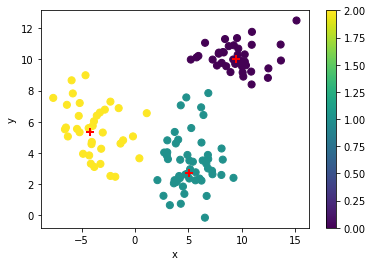

In [12]:
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt('data.csv', delimiter=',')

mean_shifter = MeanShift()
mean_shift_result = mean_shifter.cluster(data, kernel_bandwidth = 1)

original_points =  mean_shift_result.original_points
shifted_points = mean_shift_result.shifted_points
cluster_assignments = mean_shift_result.cluster_ids

x = original_points[:,0]
y = original_points[:,1]
Cluster = cluster_assignments
centers = shifted_points

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=50)
for i,j in centers:
    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

fig.savefig("mean_shift_result")

## Mean Shift Object Tracking

1. Start from the position of the model in the current frame
2. Search neighborhood in the next frame
3. Find best by maximizing a similarity func
4. Repeat the same process in the next pair of frames

<br />
<figure>
<img src="imgs/L749.png" width=300/>
<center><figcaption>Fig.34</figcaption></center>
</figure>

## Mean-Shift Object Tracking: Representation

<br />
<figure>
<img src="imgs/L750.png" width=500/>
<center><figcaption>Fig.35</figcaption></center>
</figure>

## Similarity Function

<br />
<figure>
<img src="imgs/L751.png" width=500/>
<center><figcaption>Fig.36</figcaption></center>
</figure>

$$\color{blue}{\vec{q} = \{q_u\}_{u=1..m}\sum_{u=1}^mq_u = 1}$$

$$\color{blue}{\vec{p}(y) = \{p_u(y)\}_{u=1..m}\sum_{u=1}^mp_u = 1}$$

$$\color{blue}{Similarity Function: f(y) = f[\vec{q},\vec{p}(y)]}$$

### Mean-Shift Object Tracking: Similarity Function

**The Bhattacharyya Coefficient** 
$$\color{blue}{\vec{q}' = \left (\sqrt{q_1},...,\sqrt{q_m}\right)}$$

$$\color{blue}{\vec{p}'(y) = \left (\sqrt{p_1(y)},...,\sqrt{p_m(y)}\right)}$$

$$\color{blue}{f(y) = \sum_{u=1}^m\sqrt{p_u(y)q_u}=\frac{p'(y)^Tq'}{||p'(y)||\cdot ||q'||} = cos \theta_y}$$

<br />
<figure>
<img src="imgs/L752.png" width=200/>
<center><figcaption>Fig.36</figcaption></center>
</figure>

## Gradient

- In the examples before, we computed the mean or density over a fixed region.

- That's actually a *uniform kernel*:

$$
f(n) =
  \begin{cases}
    c       & ||x|| \leq 1 \\
    0  & \text{otherwise}
  \end{cases}
$$

<br />
<figure>
<img src="imgs/L753.png" width=200/>
<center><figcaption>Fig.37(a)</figcaption></center>
</figure>

- Could instead use a differentiable, isotropic, monotonically decreasing kernel
- For example: *normal (Gaussian)*

$$K_n(x) = c\cdot exp\left (-\frac{1}{2}||x||^2\right )$$

<br />
<figure>
<img src="imgs/L754.png" width=200/>
<center><figcaption>Fig.37(b)</figcaption></center>
</figure>

- Can also have a scale factor
- <font color="red">Differentiable...</font>

- Why a gradient: you can move the mode without blind search:

<br />
<figure>
<img src="imgs/L755.png" width=200/>
<center><figcaption>Fig.37(c)</figcaption></center>
</figure>


<br />
<figure>
<img src="imgs/L756.png" width=600/>
<center><figcaption>Fig.37(d)</figcaption></center>
</figure>



## Mean shift tracking results

<font color="blue">Feature space:</font>: 16X16X16 quantized RGB

<font color="blue">Target:</font>: manually selected on $1^{st}$ frame

<font color="blue">Average mean-shift iterations:</font>: 4


<br />
<figure>
<img src="imgs/L747.gif" width=300/>
<center><figcaption>Fig.38</figcaption></center>
</figure>

## An unfair Comparasion

### Or just another sensor model....

- The notion of "best" is back to our "single" hypothesis - like Kalman.
- Could just use the similarity function as a sensor model for particle filtering

### An unfair comparison



<br />
<figure>
<img src="imgs/L757.png" width=600/>
<center><figcaption>Fig.39</figcaption></center>
</figure>


## Tracking People by Appearance

Person model = appearance + structure + dynamics

Structure and dynamics are generic, but appearance is person-specific

<br />
<figure>
<img src="imgs/L758.png" width=600/>
<img src="imgs/L72.gif" width=300/>
<center><figcaption>Fig.40: D. Ramanan, D. Forsyth, and A. Zisserman. Tracking People by Learning their Appearance. PAMI 2007</figcaption></center>
</figure>

## Tracking Issues

- Initialization
    - Manual
    - Background subtraction
    - Detection
- Obtaining observation and dynamics model
    - Dynamics model: learn from real data (pretty difficult), learn from "clean data" (easier), or specify using domain knowledge (aka you are the smart one). 
    - Generative observation model - some form of ground truth required
- Prediction vs. correction
    - If the dynamics model is too strong, will end up ignoring the data
    - If the observation model is too strong, tracking is reduced to repeated detection
- Data association
    - What if we don't know which measurements to associate with which tracks?
- Drift
    - Errors caused by dynamical model, observation model, and data association tend to accumulate over time

## Data Association

- So far, we've assumed the entire measurement to be relevant to determining the state
<br />
<figure>
<img src="imgs/L759.png" width=200/>
<center><figcaption>Fig.41(a)</figcaption></center>
</figure>
- In reality, multiple objects or *clutter* (uninformative measurements)
<br />
<figure>
<img src="imgs/L760.png" width=200/>
<center><figcaption>Fig.41(b)</figcaption></center>
</figure>

***Data association***: Determining which measurements go with which tracks

Simple strategy: Only pay attention to the measurement that is *closest* to the prediction

<br />
<figure>
<img src="imgs/L761.png" width=400/>
<center><figcaption>Fig.41(c)</figcaption></center>
</figure>

More sophesticated strategy: Keep track of multiple state/observation hypothesis

- Can be done with a set of particles (how?)
    - Each particle is a hypothesis about current state

## Drift

<br />
<figure>
<img src="imgs/L762.png" width=400/>
<center><figcaption>Fig.42: D. Ramanan, D. Forsyth, and A. Zisserman. Tracking People by Learning their Appearance. PAMI 2007</figcaption></center>
</figure>

<center>
    
# =============================
# End of L7
# =============================

</center>

<br/>
<font color="red" size="4pt"><p>But wait... <br/>We haven't seen Messi in this lesson. Well the good news, we finished this lesson after his one of greatest matches ever against Real Betis yesturday. I'll leave you with his hat trick goal. Out of this world. Out of this world</p></font>

In [4]:
# Uncomment this and run to enjoy. 
# Comment it out back and run before exiting
# as this might cause the notebook to crash
# in the next time

# from IPython.display import HTML
# HTML("""
# <br/>
# <center><font color="red" size="16px">Messi. Messi. Messi.</font></center>
# <center>
# <video controls width="620" height="440" src="imgs/messi_betis.mp4" type="video/mp4">
# </video>
# </center>
# <br/>
# <center><font color="red" size="16px">OOOO MY GODNESS MEEEE</font></center>
# """)